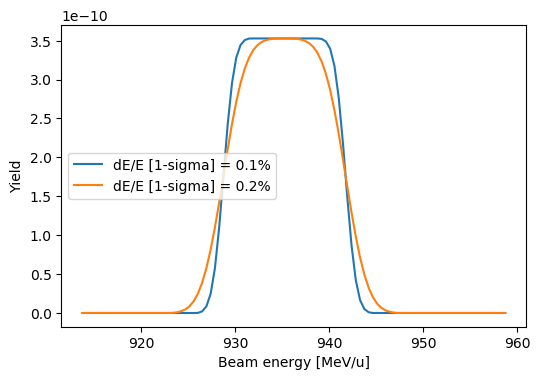

In [64]:
# Yield curve as a function of beam energy in the lab frame
# 20Ne(a,g)
import math
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def integral(e, ei, delta):
    return (math.atan((e-er)/(gamma/2)) - math.atan((e-er-de)/(gamma/2)))*np.exp(-(ei-e)**2/(2.*delta**2)) 
    
def yieldresonance(ei, delta):   
    return l*wg*eff*br/(np.pi*eps*np.sqrt(2*np.pi)*delta)*integrate.quad( lambda e: integral(e, ei, delta), ei-3*delta, ei+3*delta )[0]

er = 3715/4 # Resonance energy in keV/u
m0 = 20
m1 = 4
l = ((m0+m1)/m1)**2*4.125*10**-18/(20*er*m1*1000) # de Broglie wavelength at resonance energy l^2/2 in cm^2
wg = 20 # Resonance strength in eV
gamma = 0.2/1000/4 # Resonance width in keV/u
eps = 1.13*10**-13 # Stopping power at the resonance energy in eV cm^22/atom
de = 13 # Energy loss in the target in keV/u
eff = 1 # Detection efficiency
br = 1# Branching ratio if gamma yield

X = np.linspace(er-15, er+30, 100)
fig, ax = plt.subplots( dpi=100 )

y = [yieldresonance(ei, delta = 0.001*er) for ei in X]
ax.plot(X,y, label = 'dE/E [1-sigma] = 0.1%')

y = [yieldresonance(ei, delta = 0.002*er) for ei in X]
ax.plot(X,y, label = 'dE/E [1-sigma] = 0.2%')

ax.set_xlabel('Beam energy [MeV/u]')
ax.set_ylabel('Yield')
ax.legend()
plt.show()
#yieldresonance(1100)

fig.savefig('YieldResonance.png')

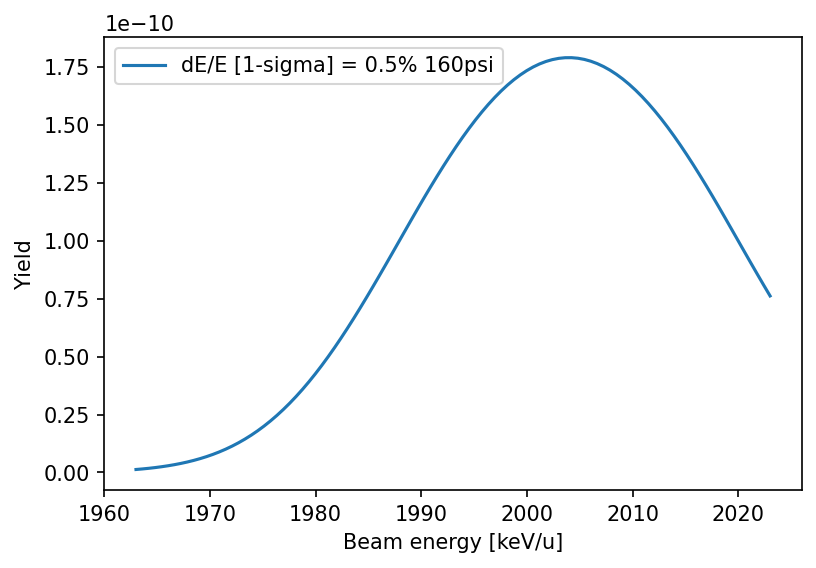

In [6]:
# Yield curve as a function of beam energy in the lab frame
# 16O(a,g)
import math
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def integral(e, ei, delta, de):
    return (math.atan((e-er)/(gamma/2)) - math.atan((e-er-de)/(gamma/2)))*np.exp(-(ei-e)**2/(2.*delta**2)) 
    
def yieldresonance(ei, delta, de):   
    return l*wg*eff*br*(m0+m1)/m1/(np.pi*eps*np.sqrt(2*np.pi)*delta)*integrate.quad( lambda e: integral(e, ei, delta, de), ei-3*delta, ei+3*delta )[0]

er = 1988 # Resonance energy in keV/u
m0 = 16
m1 = 4
l = ((m0+m1)/m1)**2*4.125*10**-18/(m0*m0*er*1000) # de Broglie wavelength at resonance energy l^2/2 in cm^2
wg = 30 # Resonance strength in eV
gamma = 1*(m0+m1)/m0/m1 # Resonance width in keV/u 
#eps = 6.2*10**-14 # Stopping power at the resonance energy in eV cm^22/atom
eps = 15*10**-14 # Stopping power at the resonance energy in eV cm^22/atom
eff = 1 # Detection efficiency
br = 1# Branching ratio if gamma yield

X = np.linspace(er-25, er+35, 100)
fig, ax = plt.subplots( dpi=150 )

#y = [yieldresonance(ei, delta = 0.001*er, de = 10**19*eps/1000/m0) for ei in X]
#ax.plot(X,y, label = 'dE/E [1-sigma] = 0.1% 10^19at/cm2')

#y = [yieldresonance(ei, delta = 0.002*er, de = 10**19*eps/1000/m0) for ei in X]
#ax.plot(X,y, label = 'dE/E [1-sigma] = 0.2% 10^19at/cm2')

y1 = [yieldresonance(ei, delta = 0.005*er, de = 0.319*160/150*10**19*eps/1000/m0) for ei in X]
ax.plot(X,y1, label = 'dE/E [1-sigma] = 0.5% 160psi')

#y2 = [yieldresonance(ei, delta = 0.002*er, de = 0.319*125/150*10**19*eps/1000/m0) for ei in X]
#ax.plot(X,y2, label = 'dE/E [1-sigma] = 0.2% 125psi')

#y3 = [yieldresonance(ei, delta = 0.002*er, de = 0.319*150/150*10**19*eps/1000/m0) for ei in X]
#ax.plot(X,y3, label = 'dE/E [1-sigma] = 0.2% 150psi')

ax.set_xlabel('Beam energy [keV/u]')
ax.set_ylabel('Yield')
ax.legend()
plt.show()
#yieldresonance(1100)

fig.savefig('YieldResonance.png')

In [2]:
print(X[np.argmax(y1)])
print(X[np.argmax(y2)])
print(X[np.argmax(y3)])

1992.090909090909
1993.0
1994.3636363636363
